# Telecom Churn Case Study

In [1]:
# Import required Libraries. 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")

## Data Preperation

In [2]:
#Read data file
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
print(df.shape)
df.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#Check for NULL values
df.isnull().sum()/len(df.index)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [5]:
# Check for 70th Percentile of average recharge amount for 6th and 7th month
df['avg_rech_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
df[['avg_rech_6_7']].describe(percentiles = [0.70])

,avg_rech_6_7
count,99999.000000
mean,325.238792
std,370.833466
min,0.000000
50%,229.000000
70%,368.500000
max,37762.500000


In [6]:
df_hv = df[(df['avg_rech_6_7']>= 368.5)]
print(df_hv.shape)
df_hv.isnull().sum()/len(df_hv.index)*100

(30011, 227)


mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.379861
std_og_t2o_mou               0.379861
loc_ic_t2o_mou               0.379861
last_date_of_month_6         0.000000
last_date_of_month_7         0.103295
last_date_of_month_8         0.523142
last_date_of_month_9         1.199560
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.052947
onnet_mou_7                  1.009630
onnet_mou_8                  3.125521
onnet_mou_9                  5.677918
offnet_mou_6                 1.052947
offnet_mou_7                 1.009630
offnet_mou_8                 3.125521
offnet_mou_9                 5.677918
roam_ic_mou_6                1.052947
roam_ic_mou_7                1.009630
roam_ic_mou_8                3.125521
roam_ic_mou_9                5.677918
roam_og_mou_6                1.052947
roam_og_mou_

In [7]:
#Remove column with high null values
df_hv = df_hv.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
             'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
             'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
             'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
             'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
             'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
             'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9'], axis=1)

# Rename columns for consistency
df_hv.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [8]:
# Impute NULL with zero
df_hv[df_hv.select_dtypes(exclude ='object').columns] = df_hv[df_hv.select_dtypes(exclude ='object').columns].apply(lambda x: x.fillna(0))
df_hv.isnull().sum()/len(df_hv.index)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.000000
std_og_t2o_mou          0.000000
loc_ic_t2o_mou          0.000000
last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             0.000000
onnet_mou_7             0.000000
onnet_mou_8             0.000000
onnet_mou_9             0.000000
offnet_mou_6            0.000000
offnet_mou_7            0.000000
offnet_mou_8            0.000000
offnet_mou_9            0.000000
roam_ic_mou_6           0.000000
roam_ic_mou_7           0.000000
roam_ic_mou_8           0.000000
roam_ic_mou_9           0.000000
roam_og_mou_6           0.000000
roam_og_mou_7           0.000000
roam_og_mou_8           0.000000
roam_og_mou_9           0.000000
loc_og_t2t_mou_6        0.000000
loc_og_t2t

In [9]:
#check values in date columns
print(df_hv['last_date_of_month_6'].value_counts())
print(df_hv['last_date_of_month_7'].value_counts())
print(df_hv['last_date_of_month_8'].value_counts())
print(df_hv['last_date_of_month_9'].value_counts())

6/30/2014    30011
Name: last_date_of_month_6, dtype: int64
7/31/2014    29980
Name: last_date_of_month_7, dtype: int64
8/31/2014    29854
Name: last_date_of_month_8, dtype: int64
9/30/2014    29651
Name: last_date_of_month_9, dtype: int64


In [10]:
# Fill Null values for date column
df_hv['last_date_of_month_7'].fillna('07/31/2014',inplace=True)
df_hv['last_date_of_month_8'].fillna('8/31/2014',inplace=True)
df_hv['last_date_of_month_9'].fillna('9/30/2014',inplace=True)

In [11]:
# Chnage obejct values to date
df_hv[df_hv.select_dtypes(include ='object').columns] = df_hv[df_hv.select_dtypes(include ='object').columns].apply(lambda x: pd.to_datetime(x,format='%m/%d/%Y'))

In [12]:
# Remove rows with null values in date column
df_hv = df_hv[(df_hv['date_of_last_rech_6'].notnull())&(df_hv['date_of_last_rech_7'].notnull())&(df_hv['date_of_last_rech_8'].notnull())]
df_hv.shape

(29317, 191)

In [13]:
# Check for NULL values
df_hv.isnull().sum()/len(df_hv.index)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.000000
std_og_t2o_mou          0.000000
loc_ic_t2o_mou          0.000000
last_date_of_month_6    0.000000
last_date_of_month_7    0.000000
last_date_of_month_8    0.000000
last_date_of_month_9    0.000000
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             0.000000
onnet_mou_7             0.000000
onnet_mou_8             0.000000
onnet_mou_9             0.000000
offnet_mou_6            0.000000
offnet_mou_7            0.000000
offnet_mou_8            0.000000
offnet_mou_9            0.000000
roam_ic_mou_6           0.000000
roam_ic_mou_7           0.000000
roam_ic_mou_8           0.000000
roam_ic_mou_9           0.000000
roam_og_mou_6           0.000000
roam_og_mou_7           0.000000
roam_og_mou_8           0.000000
roam_og_mou_9           0.000000
loc_og_t2t_mou_6        0.000000
loc_og_t2t

Only date_of_last_rech_9 column has NULL values, this can be ignored as we will be dropping this column after tagging rows

In [14]:
# Add Chrun Column
df_hv['total_usage_9'] = df_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)
df_hv['churn'] = df_hv['total_usage_9'].apply(lambda x: 1 if x == 0 else 0)

df_hv.churn.sum()/len(df_hv.index)*100

7.695193914793465

#### We have 7.70% records marked as Churn for our data set
Now we can remove the columns for last month, all attributes having \_9 in their name

In [15]:
# Drop all columns with _9 in their name
column_9 = [col for col in df_hv.columns if '_9' in col]
df_hv.drop(column_9, axis=1, inplace=True)
df_hv.drop('avg_rech_6_7',  axis=1,inplace=True)

In [16]:
df_hv.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29317 entries, 7 to 99997
Data columns (total 145 columns):
mobile_number           int64
circle_id               int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6    datetime64[ns]
last_date_of_month_7    datetime64[ns]
last_date_of_month_8    datetime64[ns]
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2

#### At the end of Data Preperation phase we have the dataset with 29317 rows and 145 columns. 
## Data Evaluation

In [17]:
df_hv.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,2.931700e+04,29317.0,29317.0,29317.0,29317.0,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.00000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.00000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.0,29317.0,29317.0,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.0,29317.0,29317.0,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000,29317.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,585.688935,593.669080,543.119372,296.779165,307.368022,272.051829,416.749883,425.838083,379.545677,17.417406,13.658398,13.512273,29.209947,22.293855,21.848742,95.017666,96.70993,88.441242,180.721928,182.

In [18]:
df_hv.corr()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
mobile_number,1.000000,NaN,NaN,NaN,NaN,0.016536,0.010026,0.017801,-0.009754,-0.014305,-0.009843,0.004333,-0.007797,0.002571,0.007172,-0.003588,0.001688,0.000237,-0.004478,-0.006792,0.042011,0.040678,0.040864,0.075842,0.072067,0.077729,0.050433,0.051997,0.055568,-0.019556,-0.020097,-0.015558,0.079054,0.076147,0.079067,-0.035737,-0.040240,-0.033571,-0.042590,-0.048433,-0.041716,0.024872,0.017286,0.019763,NaN,NaN,NaN,-0.052760,-0.059999,-0.050281,-0.003121,-0.002589,-0.005064,-0.027389,-0.029329,-0.022347,-0.014491,-0.000590,0.000681,-0.003817,-0.015256,-0.004142,0.028328,0.024033,0.027133,0.062629,0.058229,0.060967,0.052874,0.052124,0.052099,0.066689,0.061435,0.064340,-0.007742,-0.002767,-0.007389,-0.021521,-0.022869,-0.021208,0.013956,0.010151,0.012116,NaN,NaN,NaN,-0.017735,-0.016373,-0.017911,0.053724,0.047976,0.049419,-0.020151,-0.003174,-0.034196,0.012275,0.007798,0.005496,0.013917,0.012622,0.013042,-0.043370,-0.057585,-0.050192,0.016059,0.012609,0.016678,0.058269,0.052828,0.058589,0.044123,0.048623,0.043430,-0.004156,-0.003690,0.000882,-0.006833,-0.013610,-0.012385,-0.013117,-0.003297,0.000701,0.015826,0.015488,0.014219,-0.017846,-0.015966,-0.011769,0.002050,0.003040,0.015078,-0.006379,-0.006409,-0.007958,0.314439,-0.024260,-0.020518,-0.030305,-0.033909
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Text(0.5,1,'Outgoing-Minutes of Usage-Voice Calls')

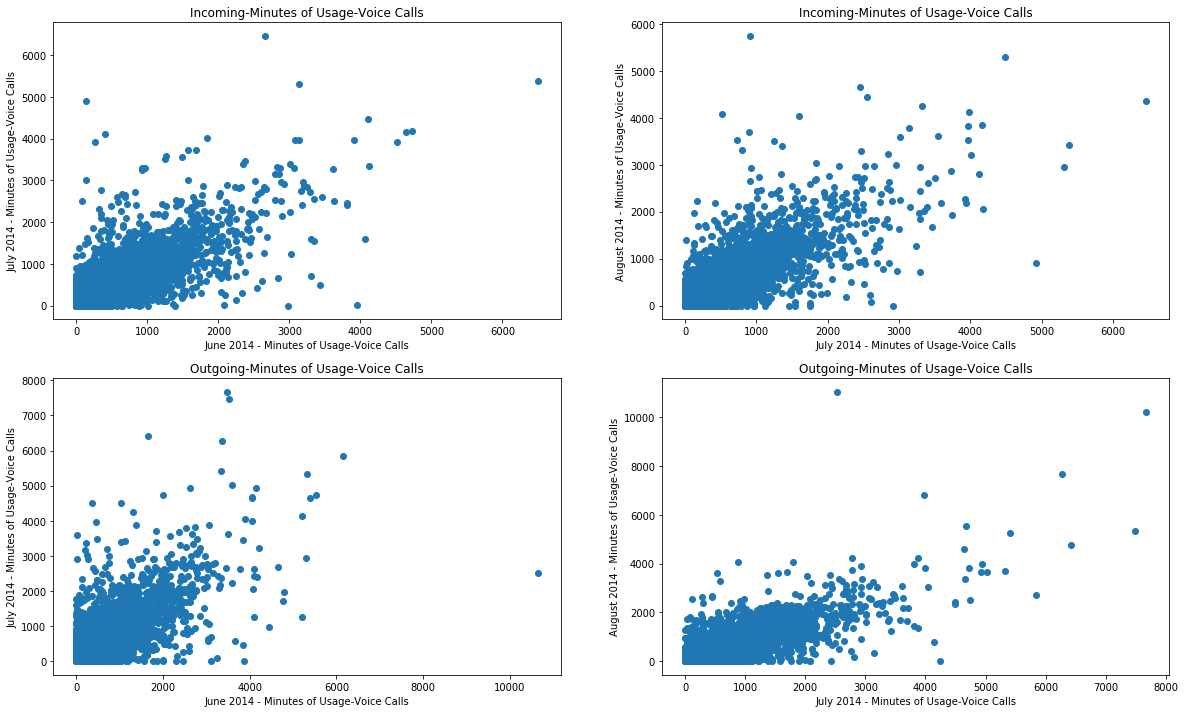

In [139]:
# initiate a new figure
plt.figure(1,figsize=(20,12))
# count plot to show the cancellation count by pickup point
plt.subplot(221)
plt.scatter(df_hv['loc_ic_mou_6'], df_hv['loc_ic_mou_7'])
plt.xlabel('June 2014 - Minutes of Usage-Voice Calls')
plt.ylabel('July 2014 - Minutes of Usage-Voice Calls')
plt.title('Incoming-Minutes of Usage-Voice Calls')
plt.subplot(222)
plt.scatter(df_hv['loc_ic_mou_7'], df_hv['loc_ic_mou_8'])
plt.xlabel('July 2014 - Minutes of Usage-Voice Calls')
plt.ylabel('August 2014 - Minutes of Usage-Voice Calls')
plt.title('Incoming-Minutes of Usage-Voice Calls')
plt.subplot(223)
plt.scatter(df_hv['loc_og_mou_6'], df_hv['loc_og_mou_7'])
plt.xlabel('June 2014 - Minutes of Usage-Voice Calls')
plt.ylabel('July 2014 - Minutes of Usage-Voice Calls')
plt.title('Outgoing-Minutes of Usage-Voice Calls')
plt.subplot(224)
plt.scatter(df_hv['loc_og_mou_7'], df_hv['loc_og_mou_8'])
plt.xlabel('July 2014 - Minutes of Usage-Voice Calls')
plt.ylabel('August 2014 - Minutes of Usage-Voice Calls')
plt.title('Outgoing-Minutes of Usage-Voice Calls')

The above plots shows that there is a decrease in the minutes of outgoing voice calls in Aug 2014 when compared to the previous months.

Text(0.5,1,'Avg of Total Recharge Amt')

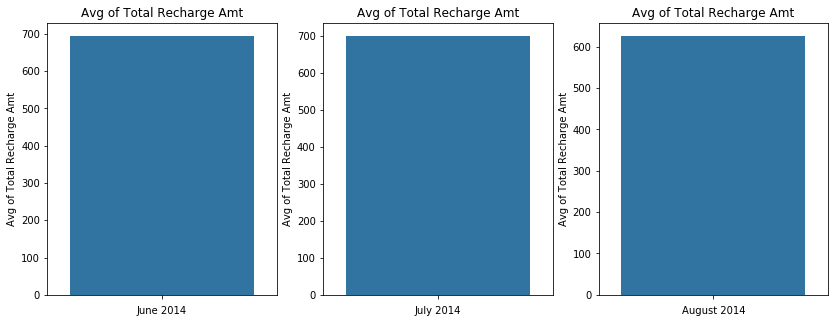

In [186]:
# initiate a new figure
plt.figure(1,figsize=(14,5))
# count plot to show the cancellation count by pickup point
plt.subplot(131)
sns.barplot(x=df_hv['total_rech_amt_6'].mean() , orient='v' )
plt.xlabel('June 2014')
plt.ylabel('Avg of Total Recharge Amt')
plt.title('Avg of Total Recharge Amt')
plt.subplot(132)
sns.barplot(x=df_hv['total_rech_amt_7'].mean() , orient='v' )
plt.xlabel('July 2014')
plt.ylabel('Avg of Total Recharge Amt')
plt.title('Avg of Total Recharge Amt')
plt.subplot(133)
sns.barplot(x=df_hv['total_rech_amt_8'].mean() , orient='v' )
plt.xlabel('August 2014')
plt.ylabel('Avg of Total Recharge Amt')
plt.title('Avg of Total Recharge Amt')

The above plots shows that there is a decrease in the total recharge amount in Aug 2014 when compared to the previous months.

## Principal Component Analysis

In [20]:
# Scale data for evaluation
df_hv_1= df_hv.drop(['churn','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','mobile_number','circle_id'],axis=1)

scl = StandardScaler()
df_hv_scl = scl.fit_transform(df_hv_1)
df_hv_scl = pd.DataFrame(df_hv_scl)
df_hv_scl.columns = list(df_hv_1.columns)
df_hv_scl.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,0.0,0.0,0.0,1.116097,1.635307,5.344952,-0.519793,-0.522748,-0.468164,0.078562,0.291559,-0.112893,-0.015025,0.258695,0.240468,-0.046330,-0.098359,0.151032,-0.183305,-0.261413,-0.203414,0.514638,1.105313,-0.030813,2.432546,2.122382,2.301866,-0.226802,-0.200529,-0.233303,0.367583,0.659507,-0.023672,-0.455254,-0.415568,-0.395045,-0.371419,-0.417285,-0.317908,0.385693,1.357373,1.276327,0.0,0.0,0.0,-0.553981,-0.538105,-0.455032,-0.047515,-0.044159,0.175190,-0.075802,-0.321734,-0.021984,-0.303507,-0.017341,-0.017897,-0.303417,-0.153188,-0.413458,-0.068942,-0.230288,-0.252827,0.261790,0.269328,-0.159592,2.975053,1.710263,0.560174,0.590377,0.332584,-0.161709,0.261472,-0.060959,0.206023,0.598904,0.876925,1.037157,2.465480,1.510847,0.953504,0.0,0.0,0.0,0.929494,0.794638,1.018335,0.888335,0.647562,0.355026,0.732751,-0.099363,-0.239692,-0.134515,0.026735,0.261281,1.036148,0.881946,1.064146,-0.755539,-0.734863,-0.364087,1.675094,0.159467,5.012409,8.493634,3.494639,8.263972,-0.772067,-0.774438,4.734994,-0.292518,-0.286680,-0.273282,-0.285138,-0.280687,-0.260891,-0.298688,-0.327257,-0.317913,-0.335422,-0.341563,-0.323298,-0.295909,-0.311398,-0.333564,-0.302672,-0.300266,-0.300728,-0.157946,-0.155744,-0.145789,-0.474910,-0.188440,-0.285554,-0.263975
1,0.0,0.0,0.0,-0.477767,-0.219386,-0.825136,0.254330,0.090326,-0.504827,-0.689861,-0.712193,-0.511606,-0.220394,-0.178168,-0.179243,-0.247404,-0.225973,-0.203554,0.849188,0.483694,-0.320788,-0.401392,-0.464081,-0.509100,-0.306379,-0.312945,-0.322024,-0.226802,-0.200529,0.724858,0.251427,0.006308,-0.549878,-0.180381,-0.159220,-0.369457,-0.459444,-0.466908,-0.254287,-0.162899,-0.151431,-0.153518,0.0,0.0,0.0,-0.438867,-0.430931,-0.421928,-0.047515,-0.048075,-0.045688,-0.316993,-0.321734,0.139374,-0.303507,-0.017341,-0.017897,-0.271625,-0.413303,-0.675087,-0.286122,-0.363250,-0.424660,-0.463178,-0.672208,-0.643600,-0.340070,-0.333988,-0.338523,-0.524609,-0.712924,-0.719442,-0.204943,-0.192747,-0.208020,-0.095652,-0.278950,-0.284873,-0.143407,-0.145183,-0.132382,0.0,0.0

In [21]:
pca = PCA(svd_solver='randomized', random_state=100)
df_pca = pca.fit_transform(df_hv_scl)
df_pca = pd.DataFrame(df_pca)
df_pca.shape

(29317, 136)

In [22]:
pd.DataFrame(pca.components_).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,7.282314e-18,5.551115e-17,-3.053113e-16,0.133169,0.137429,0.145705,0.017632,0.020880,0.032532,0.086360,0.087960,0.098554,0.007425,0.003033,0.009520,-0.001391,-0.003216,0.004854,0.111027,0.113256,0.115901,0.169122,0.176435,0.177666,0.084257,0.087407,0.088642,0.004305,0.000328,0.004248,0.185478,0.193102,0.193139,-0.043930,-0.041643,-0.029457,-0.015850,-0.010548,0.000638,0.031768,0.033889,0.033231,0.0,0.0,0.0,-0.039932,-0.034593,-0.018648,0.049285,0.052761,0.051220,0.010773,0.007060,0.010058,0.000925,0.009147,0.008853,0.074396,0.077927,0.090554,0.121986,0.127019,0.131365,0.178691,0.187718,0.185941,0.096811,0.097197,0.097827,0.203210,0.213312,0.212264,0.030808,0.033282,0.036247,0.047180,0.048349,0.050665,0.040188,0.040826,0.036703,0.0,0.0,0.0,0.056897,0.058794,0.061782,0.205615,0.214463,0.213720,-0.001108,-0.003426,-0.016632,0.036352,0.037201,0.037005,0.016333,0.020192,0.021441,0.002999,0.001476,0.012238,0.129222,0.133024,0.142058,0.097810,0.096891,0.114930,0.076343,0.080090,0.089680,0.027577,0.028943,0.033595,-0.001203,-0.002306,0.002176,0.042327,0.046567,0.051887,0.019452,0.019345,0.023002,-0.010836,-0.011988,-0.008780,0.044939,0.048905,0.056914,0.004207,0.003865,0.006007,0.064263,0.058420,0.053885,0.051604
1,-9.514338e-17,-1.110223e-16,2.775558e-17,0.118719,0.138021,0.126081,0.163515,0.187119,0.179898,0.148813,0.172758,0.159336,0.011635,0.004244,0.011065,0.033262,0.028238,0.033413,0.015089,0.026532,0.026626,-0.019334,-0.012549,-0.012060,-0.036912,-0.038167,-0.038749,0.021426,0.031345,0.031898,-0.005407,0.007319,0.007371,0.171262,0.192229,0.185564,0.171073,0.190404,0.178847,-0.010659,-0.009009,-0.011924,0.0,0.0,0.0,0.232497,0.260034,0.244798,0.042955,0.045259,0.044923,0.044035,0.056022,0.050945,0.035469,-0.000430,0.000078,0.215170,0.251864,0.230081,-0.038753,-0.033739,-0.033196,-0.063582,-0.056924,-0.056185,-0.053006,-0.050605,-0.050426,-0.072683,-0.065452,-0.063805,0.034895,0.038189,0.039132,0.029307,0.035916,0.036721,-0.014165,-0.015087,-0.013887,0.0,0.0,0.0,0.038671,0.045077,0.045571,-0.050342,-0.039584,-0.038317,0.004387,-0.003281,0.025456,-0.011739,-0.008995,-0.008300,-0.005037,-0.001400,-0.002924,0.104521,0.121954,0.122376,0.116431,0.133588,0.124172,-0.036262,-0.027237,-0.015151,-0.017849,-0.010600,-0.015756,-0.053859,-0.049736,-0.044815,-0.037276,-0.031432,-0.026259,-0.065558,-0.068492,-0.063138,-0.056332,-0.054630,-0.050629,-0.014948,-0.008318,-0.005968,-0.060489,-0.059836,-0.056931,-0.025981,-0.022081,-0.019358,-0.067266,-0.065421,-0.068806,-0.066629
2,-3.047500e-17,-0.000000e+00,-1.110223e-16,0.140636,0.161813,0.155719,-0.032898,-0.025527,-0.016030,-0.013708,-0.003058,0.007346,0.034208,0.039073,0.039770,0.041344,0.050194,0.050070,-0.068503,-0.065523,-0.060019,-0.066262,-0.065578,-0.055111,0.002045,0.002666,0.000898,0.002129,0.008215,0.007004,-0.086259,-0.085220,-0.073895,-0.001317,0.005187,0.011506,0.005980,0.014378,0.020348,0.011550,0.014101,0.011025,-0.0,-0.0,-0.0,0.003420,0.013659,0.021659,0.093290,0.100106,0.097106,0.009488,0.007749,0.002269,-0.019084,0.007531,0.002393,-0.040120,-0.027168,-0.013526,-0.084233,-0.083624,-0.078542,-0.090323,-0.088208,-0.081236,-0.033762,-0.035295,-0.031763,-0.111948,-0.111344,-0.101933,0.002491,0.006499,0.009032,-0.001650,0.004485,0.006298,-0.000577,0.002915,0.003076,-0.0,-0.0,-0.0,0.000155,0.007273,0.009793,-0.094508,-0.088772,-0.080389,-0.014999,-0.002737,-0.004392,0.014611,0.016797,0.014397,-0.008235,-0.004407,-0.009352,-0.006941,0.003760,0.010792,0.139545,0.156857,0.153184,0.126037,0.133745,0.135497,0.099017,0.092901,0.091556,0.205693,0.215986,0.203756


#### Lets plot screeplot to check the cummulative variance captured by principal components 

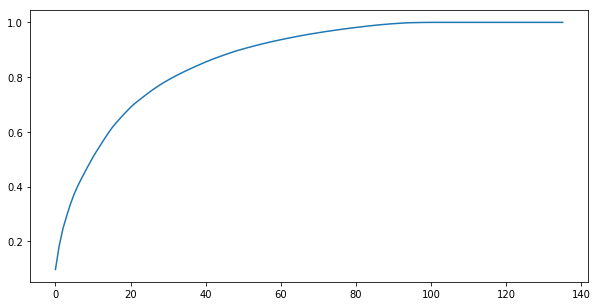

In [23]:
plt.figure(figsize=[10,5])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
label=0
for xy in zip(pd.Series(list(np.arange(137))),np.cumsum(pca.explained_variance_ratio_)):
    label = label + pca.explained_variance_ratio_[xy[0]]
    #plt.annotate(s=round(label*100,2),xy=xy )
plt.show()

In [24]:
list(zip(pd.Series(list(np.arange(137))),np.cumsum(pca.explained_variance_ratio_)))

[(0, 0.09712744678628106),
 (1, 0.18321155239607395),
 (2, 0.2463311229957942),
 (3, 0.29310626093052805),
 (4, 0.33625533967313426),
 (5, 0.3731893020149642),
 (6, 0.403799835851161),
 (7, 0.4312541476698134),
 (8, 0.4577349965024186),
 (9, 0.4830754955626997),
 (10, 0.5078432144463101),
 (11, 0.5303984107374798),
 (12, 0.5521664669810438),
 (13, 0.5734501035346004),
 (14, 0.5941113756517565),
 (15, 0.6136324231584376),
 (16, 0.6306057968694104),
 (17, 0.64607482368184),
 (18, 0.6611654531629462),
 (19, 0.675646750816382),
 (20, 0.6896727930907305),
 (21, 0.7020253076526722),
 (22, 0.7130506025379262),
 (23, 0.7239084800833595),
 (24, 0.7345421937279588),
 (25, 0.7448114978052163),
 (26, 0.7547561247304291),
 (27, 0.7639682131055725),
 (28, 0.7730862818186408),
 (29, 0.7815013369781001),
 (30, 0.7894356685622956),
 (31, 0.7970522279710403),
 (32, 0.8043080748486676),
 (33, 0.8113458818367131),
 (34, 0.8181213670158407),
 (35, 0.8246599912884467),
 (36, 0.8311053059193851),
 (37, 0.837

66 components are able to capture 95% (0.9503622017394399) of variance

In [25]:
df_pca = df_pca[list(np.arange(66))]
df_pca.shape

(29317, 66)

In [26]:
X_pca = df_pca.copy()
y = df_hv['churn']

In [27]:
# Check for class imbalance
print(y.value_counts())

print('Ratio = ',round(y.value_counts()[0]/y.value_counts()[1],2))

0    27061
1     2256
Name: churn, dtype: int64
Ratio =  12.0


### As we have only 12% recods marked as churn we clearly have a class imbalance. 
Class imbalance can cause incorrect predictions when evalution of our machine learning algorithm is based on accuracy. For our dataset, even if all the records are predicted as **not churn**, our model will still evaluate to 92.3% accuracy.

In order to handle class imbalance in our dataset we will perform **under sampleling using Cluster Centroids method**

In [28]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 2256})
X_cc, y_cc = cc.fit_sample(X_pca, y)

In [29]:
y_cc = pd.Series(y_cc)
X_cc = pd.DataFrame(X_cc)

In [30]:
# Check for class imbalance again
print(y_cc.value_counts())
print('Ratio = ',round(y_cc.value_counts()[0]/y_cc.value_counts()[1],2))

1    2256
0    2256
dtype: int64
Ratio =  1.0


In [31]:
X_cc.shape

(4512, 66)

#### Split test and train dataset

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cc,y_cc,train_size=0.7,test_size=0.3, random_state=100)

### Train SVM model with Polynomial kernal for classification and tune parameters

In [33]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
hyper_params = {'C': [0.1,1,2,3,4,5,6,7,8,9,10]}


# Using Polynomial kernel with SVM Model
model_poly = SVC(kernel='poly')

# set up GridSearchCV()
model_cv_poly = GridSearchCV(estimator = model_poly, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



# fit the model
model_cv_poly.fit(X_train,y_train)        

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   24.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [34]:
# cv results
cv_results = pd.DataFrame(model_cv_poly.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.298507,0.013523,0.050601,0.001478,0.1,{'C': 0.1},0.778481,0.762658,0.810127,0.774960,0.762282,0.777707,0.017459,11,0.841251,0.842835,0.835313,0.842897,0.843688,0.841197,0.003046
1,0.249144,0.010871,0.040230,0.001990,1,{'C': 1},0.806962,0.829114,0.859177,0.824089,0.809826,0.825839,0.018648,10,0.907759,0.910135,0.909343,0.909774,0.910962,0.909595,0.001061
2,0.244555,0.011742,0.036773,0.000820,2,{'C': 2},0.825949,0.829114,0.876582,0.838352,0.816165,0.837239,0.020916,9,0.930325,0.938638,0.935075,0.936288,0.936288,0.935323,0.002753
3,0.242606,0.012492,0.036321,0.000731,3,{'C': 3},0.832278,0.832278,0.887658,0.849445,0.825674,0.845472,0.022524,8,0.942993,0.951306,0.951702,0.948951,0.945786,0.948148,0.003329
4,0.246232,0.014034,0.034723,0.000613,4,{'C': 4},0.838608,0.838608,0.895570,0.854200,0.833597,0.852122,0.022810,5,0.954078,0.960016,0.959224,0.956866,0.952909,0.956618,0.002779
5,0.248740,0.009001,0.033862,0.001096,5,{'C': 5},0.837025,0.843354,0.898734,0.846276,0.843106,0.853705,0.022724,3,0.961203,0.965954,0.965162,0.960427,0.962406,0.963031,0.002172
6,0.258928,0.010480,0.035610,0.001049,6,{'C': 6},0.840190,0.844937,0.893987,0.849445,0.846276,0.854972,0.019742,1,0.965558,0.973080,0.969121,0.964780,0.967550,0.968018,0.002953
7,0.260606,0.009477,0.033919,0.001015,7,{'C': 7},0.837025,0.848101,0.882911,0.854200,0.849445,0.854338,0.015361,2,0.968725,0.973872,0.973080,0.968738,0.969925,0.970868,0.002188
8,0.273869,0.020463,0.033606,0.001272,8,{'C': 8},0.835443,0.844937,0.881329,0.852615,0.849445,0.852755,0.015421,4,0.970705,0.975059,0.973476,0.971903,0.973091,0.972847,0.001472
9,0.261007,0.013731,0.033001,0.000618,9,{'C': 9},0.835443,0.841772,0.882911,0.849445,0.844691,0.850855,0.016664,6,0.971496,0.977435,0.973476,0.974278,0.975465,0.974430,0.001982


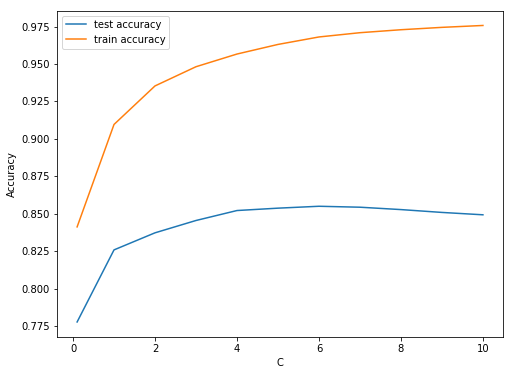

In [35]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

Cost parameter of 5 is giving best results. Lets test the prediction score with SVM

In [36]:
# final model with C= 5 and polynimial kernel
model = SVC(C=5, kernel='poly')

# Fit model on larger test set
model.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
# Lets predict the results based on our test set
y_pred = model.predict(X_test)

In [38]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[576,  95],
       [104, 579]])

In [39]:
# print metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average=None))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average=None))


accuracy 0.8530280649926145
precision [0.84705882 0.85905045]
recall [0.85842027 0.8477306 ]


#### We get a Recall/Sensitivity for churn customers as 84.77% using SVM with polynomial Kernal. 

### Train SVM model with rbf kernal for classification and tune parameters

In [40]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
hyper_params = {'C': [0.1,1, 1.25,1.5,1.75,2]}


# Using Polynomial kernel with SVM Model
model_rbf = SVC(kernel='rbf')

# set up GridSearchCV()
model_cv_rbf = GridSearchCV(estimator = model_rbf, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



# fit the model
model_cv_rbf.fit(X_train,y_train)        

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 1.25, 1.5, 1.75, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [41]:
# cv results
cv_results = pd.DataFrame(model_cv_rbf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.405405,0.009428,0.081012,0.001568,0.1,{'C': 0.1},0.816456,0.808544,0.857595,0.808241,0.819334,0.822039,0.018308,6,0.834917,0.832937,0.826603,0.830629,0.833004,0.831618,0.002852
1,0.373615,0.007121,0.072657,0.001780,1,{'C': 1},0.860759,0.849684,0.886076,0.852615,0.847861,0.859405,0.014053,5,0.932700,0.942993,0.931908,0.931144,0.939454,0.935640,0.004720
2,0.377763,0.012645,0.074061,0.001206,1.25,{'C': 1.25},0.862342,0.848101,0.887658,0.855784,0.849445,0.860671,0.014418,3,0.940618,0.948931,0.940222,0.942620,0.946181,0.943714,0.003355
3,0.382869,0.005881,0.071938,0.001415,1.5,{'C': 1.5},0.867089,0.848101,0.884494,0.858954,0.844691,0.860671,0.014320,3,0.944576,0.954473,0.945764,0.946577,0.950534,0.948385,0.003642
4,0.390643,0.009278,0.073947,0.001792,1.75,{'C': 1.75},0.865506,0.848101,0.884494,0.860539,0.846276,0.860988,0.013827,2,0.947348,0.958036,0.950515,0.948951,0.952513,0.951473,0.003700
5,0.380947,0.005436,0.072259,0.002331,2,{'C': 2},0.865506,0.844937,0.884494,0.866878,0.847861,0.861938,0.014376,1,0.952890,0.960412,0.952098,0.950930,0.954096,0.954085,0.003327


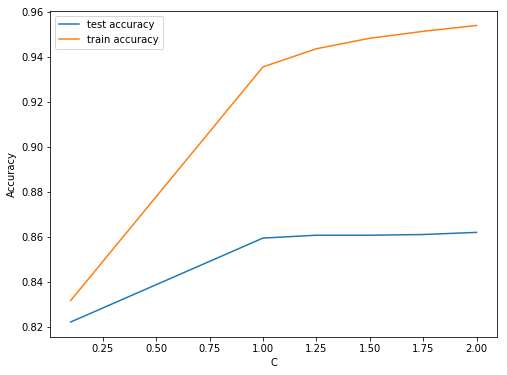

In [42]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')

Cost parameter of 1.25 is giving best results. Lets test the prediction score with SVM

In [43]:
# final model with C= 5 and polynimial kernel
model = SVC(C=1.25, kernel='rbf')

# Fit model on larger test set
model.fit(X_train,y_train)

SVC(C=1.25, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
# Lets predict the results based on our test set
y_pred = model.predict(X_test)

In [45]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[618,  53],
       [131, 552]])

In [46]:
# print metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average=None))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average=None))


accuracy 0.8641063515509602
precision [0.82510013 0.91239669]
recall [0.92101341 0.80819912]


#### We get a Recall/Sensitivity for churn customers as 80.81% using SVM with rbf Kernal. 

### Lets also try Random Forest classify customer churn 

In [47]:
# Create the parameter grid 
param_grid = {
    'max_depth': [3,4,5],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'n_estimators': [100,200,300], 
    'max_features': [5,10,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8457884737175427 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [49]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=100)

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred = rfc.predict(X_test)

In [52]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[605,  66],
       [147, 536]])

In [53]:
# print metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average=None))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average=None))


accuracy 0.8426883308714919
precision [0.80452128 0.89036545]
recall [0.90163934 0.78477306]


### Considering results from all the classification models tested, SVM model with polynomial kernal is giving best results of 84.77% recall value

## Let's build Logistic Regression model and find important features 

In [54]:
# Put the feature variables in X
X = df_hv.drop(['churn','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','mobile_number','circle_id'], 1)
X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.

In [55]:
# Put the target variable in y
y = df_hv['churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [56]:
#Resolving class-imbalance using Cluster Centroids method

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 2256})
X_cc_1, y_cc_1 = cc.fit_sample(X, y)

In [57]:
y_cc_1 = pd.Series(y_cc_1)
X_cc_1 = pd.DataFrame(X_cc_1)

In [58]:
# Check for class imbalance again

print(y_cc_1.value_counts())
print('Ratio = ',round(y_cc_1.value_counts()[0]/y_cc_1.value_counts()[1],2))

1    2256
0    2256
dtype: int64
Ratio =  1.0


In [59]:
X_cc_1.shape

(4512, 136)

In [60]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X_cc_1, y_cc_1, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the data

In [61]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = list(X.columns)
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,0.0,0.0,0.0,0.023485,0.013345,0.016100,0.004807,0.003337,0.002030,0.016648,0.007157,0.005576,1.539364e-18,3.726665e-18,1.225775e-18,3.764355e-18,3.790181e-18,6.656712e-19,0.005514,0.003678,0.002030,0.015138,0.013626,0.013819,1.568863e-04,7.423572e-19,2.869751e-18,2.023027e-03,1.553194e-18,1.732152e-18,0.010034,0.011638,0.008188,0.000000,3.494332e-18,0.000000,0.000672,0.000565,6.154104e-04,0.000000,0.000000,8.591229e-19,0.0,0.0,0.0,0.000576,0.000480,0.000614,1.189735e-02,0.00046,2.630919e-04,0.004481,3.938252e-03,1.097045e-02,3.689951e-02,2.062190e-19,1.977851e-20,0.014590,0.008917,0.007420,0.013985,0.008390,0.011409,0.036986,0.034725,0.030899,0.008517,0.003921,0.002144,0.051382,0.031812,0.039086,0.051395,0.063298,0.035758,2.972854e-03,0.001815,0.001366,3.700661e-04,3.908961e-19,1.910212e-18,0.0,0.0,0.0,0.035208,0.063242,0.021844,0.388624,0.311452,0.404323,0.039326,6.220840e-02,6.682723e-18,0.377637,4.257700e-01,5.316609e-01,0.022270,4.893571e-03,7.385466e-02,0.209402,0.109489,0.126984,0.016681,0.008789,0.009400,0.021073,0.030918,0.041483,0.001516,0.004839,0.008826,3.448276e-02,1.142877e-17,1.111111e-02,1.353794e-03,1.369141e-03,7.154865e-03,1.566085e-02,1.181241e-02,3.191824e-02,1.387779e-17,1.250000e-01,2.081668e-17,1.911765e-01,0.142857,0.181818,3.532528e-17,1.561251e-17,0.05,3.448276e-02,8.410780e-19,7.304099e-19,0.161367,5.183599e-02,8.858214e-03,1.415521e-02
1,0.0,0.0,0.0,0.020770,0.023280,0.007905,0.065643,0.128059,0.001419,0.011492,0.005804,0.000479,1.539364e-18,1.056830e-03,1.169635e-03,3.764355e-18,3.061834e-03,4.118388e-03,0.001452,0.002848,0.000000,0.005502,0.007974,0.000000,1.211678e-18,7.423572e-19,2.869751e-18,6.605915e-19,1.553194e-18,1.732152e-18,0.003306,0.007483,0.000000,0.064464,1.247876e-01,0.000000,0.008115,0.001593,2.037393e-18,0.000000,0.000000,8.591229e-19,0.0,0.0,0.0,0.070293,0.094158,0.000000,6.875957e-19,0.00000,8.563916e-19,0.003382,8.935131e-03,2.289946e-18,2.576521e-18,2.062190e-19,1.977851e-20,0.053001,0.096656,0.000000,0.003484,0.003482,0.000000,0.006975,0.00932

## Model Building

In [63]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Feature Selection using RFE Method

In [64]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 122),
 ('std_og_t2o_mou', False, 121),
 ('loc_ic_t2o_mou', False, 120),
 ('arpu_6', False, 34),
 ('arpu_7', False, 51),
 ('arpu_8', False, 11),
 ('onnet_mou_6', False, 106),
 ('onnet_mou_7', False, 71),
 ('onnet_mou_8', False, 7),
 ('offnet_mou_6', False, 66),
 ('offnet_mou_7', False, 80),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_6', False, 52),
 ('roam_ic_mou_7', False, 113),
 ('roam_ic_mou_8', False, 84),
 ('roam_og_mou_6', False, 94),
 ('roam_og_mou_7', False, 29),
 ('roam_og_mou_8', False, 35),
 ('loc_og_t2t_mou_6', False, 85),
 ('loc_og_t2t_mou_7', False, 26),
 ('loc_og_t2t_mou_8', False, 20),
 ('loc_og_t2m_mou_6', False, 17),
 ('loc_og_t2m_mou_7', False, 31),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 68),
 ('loc_og_t2f_mou_7', False, 83),
 ('loc_og_t2f_mou_8', False, 40),
 ('loc_og_t2c_mou_6', False, 112),
 ('loc_og_t2c_mou_7', False, 39),
 ('loc_og_t2c_mou_8', False, 91),
 ('loc_og_mou_6', False, 38),
 ('loc_og_mou_7', True, 1),
 

In [66]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [67]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [68]:
# Import statsmodels

import statsmodels.api as sm

In [69]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3158
Model:                            GLM   Df Residuals:                     3142
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1034.4
Date:                Mon, 13 May 2019   Deviance:                       2068.7
Time:                        19:59:20   Pearson chi2:                 3.50e+04
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8015      0.115     24.396      0.000       2.576       3.027
loc_og_t2m_mou_8      -3.3310      4.607     -0.723      0.470     -12.360       5.698
loc_og_mou_7          -1.6316      1.959     -0.833      0.405      -5.471       2.207
loc_og_mou_8           3.4564     23.003      0.150      0.881     -41.629      48.542
std_og_mou_8          23.5861     27.747      0.850      0.395     -30.798      77.970
total_og_mou_8       -36.7064     27.872     -1.317      0.188     -91.335      17.922
loc_ic_mou_8           0.6397      4.421      0.145      0.885      -8.026       9.305
total_ic_mou_8       -16.6016      3.516     -4.721      0.000     -23.494      -9.709
total_rech_num_8      -6.0219      1.204     -5.001      0.000      -8.382      -3.662
max_rech_amt_8        -1.4249      1.133     -1.258      0.208      -3.645       0.795
last_day_rch_amt_8    -7.0795      1.843     -3.841      0.000     -10.692      -3.467
vol_3g_mb_8           -5.6814      2.437     -2.331      0.020     -10.457      -0.905
monthly_2g_6          -3.8094      0.851     -4.476      0.000      -5.477      -2.141
monthly_2g_8         -10.1019      1.421     -7.108      0.000     -12.887      -7.317
monthly_3g_8         -11.1821      2.224     -5.028      0.000     -15.541      -6.824
vbc_3g_7              -3.6393      1.072     -3.395      0.001      -5.741      -1.538
======================================================================================
"""

In [70]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,354.12
3,std_og_mou_8,212.07
2,loc_og_mou_8,93.64
5,loc_ic_mou_8,5.15
6,total_ic_mou_8,5.14
1,loc_og_mou_7,4.27
8,max_rech_amt_8,3.84
9,last_day_rch_amt_8,2.95
13,monthly_3g_8,2.71
10,vol_3g_mb_8,2.70


Removing <B>total_og_mou_8</B> column due to high VIF and P value

In [73]:
X_train.drop('total_og_mou_8', axis = 1, inplace = True)

In [74]:
# Refit the model with the new set of features

logm1 = sm.GLM(np.array(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3158
Model:                            GLM   Df Residuals:                     3143
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1035.5
Date:                Mon, 13 May 2019   Deviance:                       2071.0
Time:                        20:02:52   Pearson chi2:                 3.33e+04
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8158      0.115     24.558      0.000       2.591       3.041
loc_og_t2m_mou_8      -3.1533      4.596     -0.686      0.493     -12.162       5.855
loc_og_mou_7          -1.8013      1.937     -0.930      0.352      -5.598       1.995
loc_og_mou_8         -25.1187      7.455     -3.369      0.001     -39.731     -10.506
std_og_mou_8         -12.8317      1.548     -8.288      0.000     -15.866      -9.797
loc_ic_mou_8           1.2608      4.455      0.283      0.777      -7.471       9.993
total_ic_mou_8       -17.1873      3.568     -4.817      0.000     -24.180     -10.194
total_rech_num_8      -6.3016      1.191     -5.292      0.000      -8.636      -3.968
max_rech_amt_8        -1.9687      1.046     -1.881      0.060      -4.020       0.082
last_day_rch_amt_8    -7.1126      1.842     -3.861      0.000     -10.723      -3.502
vol_3g_mb_8           -5.6133      2.443     -2.298      0.022     -10.401      -0.826
monthly_2g_6          -3.7953      0.852     -4.455      0.000      -5.465      -2.126
monthly_2g_8         -10.0447      1.421     -7.069      0.000     -12.830      -7.260
monthly_3g_8         -11.0281      2.212     -4.984      0.000     -15.365      -6.692
vbc_3g_7              -3.6046      1.069     -3.370      0.001      -5.701      -1.508
======================================================================================
"""

In [75]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,5.15
5,total_ic_mou_8,5.14
2,loc_og_mou_8,4.73
1,loc_og_mou_7,4.27
7,max_rech_amt_8,3.43
8,last_day_rch_amt_8,2.89
12,monthly_3g_8,2.71
9,vol_3g_mb_8,2.70
6,total_rech_num_8,2.53
0,loc_og_t2m_mou_8,2.29


Removing <B>loc_ic_mou_8</B> column due to VIF value > 5

In [76]:
X_train.drop('loc_ic_mou_8', axis = 1, inplace = True)

In [77]:
# Refit the model with the new set of features

logm1 = sm.GLM(np.array(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3158
Model:                            GLM   Df Residuals:                     3144
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1035.5
Date:                Mon, 13 May 2019   Deviance:                       2071.1
Time:                        20:03:43   Pearson chi2:                 3.28e+04
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8172      0.115     24.584      0.000       2.593       3.042
loc_og_t2m_mou_8      -3.0559      4.560     -0.670      0.503     -11.994       5.882
loc_og_mou_7          -1.7920      1.936     -0.926      0.355      -5.587       2.003
loc_og_mou_8         -24.8313      7.344     -3.381      0.001     -39.225     -10.438
std_og_mou_8         -12.8640      1.545     -8.328      0.000     -15.892      -9.836
total_ic_mou_8       -16.3621      1.980     -8.265      0.000     -20.242     -12.482
total_rech_num_8      -6.3221      1.189     -5.319      0.000      -8.652      -3.993
max_rech_amt_8        -1.9995      1.039     -1.925      0.054      -4.036       0.037
last_day_rch_amt_8    -7.1109      1.842     -3.861      0.000     -10.720      -3.501
vol_3g_mb_8           -5.6096      2.443     -2.296      0.022     -10.397      -0.822
monthly_2g_6          -3.7920      0.852     -4.450      0.000      -5.462      -2.122
monthly_2g_8         -10.0292      1.419     -7.066      0.000     -12.811      -7.247
monthly_3g_8         -11.0242      2.212     -4.984      0.000     -15.360      -6.689
vbc_3g_7              -3.5969      1.069     -3.365      0.001      -5.692      -1.502
======================================================================================
"""

In [78]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,4.72
1,loc_og_mou_7,4.26
6,max_rech_amt_8,3.42
7,last_day_rch_amt_8,2.89
11,monthly_3g_8,2.71
8,vol_3g_mb_8,2.70
5,total_rech_num_8,2.53
0,loc_og_t2m_mou_8,2.27
3,std_og_mou_8,1.81
12,vbc_3g_7,1.60


Removing <B> loc_og_t2m_mou_8 </B> due to high P value even though VIF value is less than 5.

In [79]:
X_train.drop('loc_og_t2m_mou_8', axis = 1, inplace = True)

In [80]:
# Refit the model with the new set of features

logm1 = sm.GLM(np.array(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3158
Model:                            GLM   Df Residuals:                     3145
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1035.8
Date:                Mon, 13 May 2019   Deviance:                       2071.5
Time:                        20:04:25   Pearson chi2:                 2.80e+04
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8161      0.115     24.565      0.000       2.591       3.041
loc_og_mou_7          -1.7957      1.947     -0.923      0.356      -5.611       2.019
loc_og_mou_8         -28.6078      5.164     -5.540      0.000     -38.729     -18.486
std_og_mou_8         -12.8366      1.544     -8.315      0.000     -15.862      -9.811
total_ic_mou_8       -16.5026      1.983     -8.323      0.000     -20.389     -12.616
total_rech_num_8      -6.3474      1.190     -5.334      0.000      -8.680      -4.015
max_rech_amt_8        -2.0150      1.041     -1.936      0.053      -4.055       0.025
last_day_rch_amt_8    -7.1399      1.842     -3.875      0.000     -10.751      -3.529
vol_3g_mb_8           -5.6087      2.443     -2.296      0.022     -10.397      -0.820
monthly_2g_6          -3.8049      0.851     -4.470      0.000      -5.473      -2.137
monthly_2g_8         -10.0199      1.419     -7.063      0.000     -12.801      -7.239
monthly_3g_8         -11.0051      2.210     -4.980      0.000     -15.336      -6.674
vbc_3g_7              -3.6107      1.069     -3.379      0.001      -5.705      -1.516
======================================================================================
"""

In [81]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_mou_8,4.29
0,loc_og_mou_7,4.23
5,max_rech_amt_8,3.42
6,last_day_rch_amt_8,2.87
10,monthly_3g_8,2.71
7,vol_3g_mb_8,2.69
4,total_rech_num_8,2.51
2,std_og_mou_8,1.80
11,vbc_3g_7,1.60
9,monthly_2g_8,1.57


Removing <B> loc_og_mou_7 </B> due to high P value even though VIF value is less than 5.

In [82]:
X_train.drop('loc_og_mou_7', axis = 1, inplace = True)

In [83]:
# Refit the model with the new set of features

logm1 = sm.GLM(np.array(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3158
Model:                            GLM   Df Residuals:                     3146
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1036.2
Date:                Mon, 13 May 2019   Deviance:                       2072.3
Time:                        20:05:02   Pearson chi2:                 2.92e+04
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7869      0.110     25.436      0.000       2.572       3.002
loc_og_mou_8         -31.6152      4.077     -7.755      0.000     -39.605     -23.625
std_og_mou_8         -12.6703      1.528     -8.293      0.000     -15.665      -9.676
total_ic_mou_8       -16.3976      1.977     -8.295      0.000     -20.272     -12.523
total_rech_num_8      -6.2842      1.186     -5.301      0.000      -8.608      -3.961
max_rech_amt_8        -2.0015      1.041     -1.922      0.055      -4.043       0.040
last_day_rch_amt_8    -7.0680      1.837     -3.848      0.000     -10.668      -3.468
vol_3g_mb_8           -5.5960      2.443     -2.291      0.022     -10.383      -0.809
monthly_2g_6          -3.7670      0.850     -4.433      0.000      -5.432      -2.102
monthly_2g_8          -9.9548      1.414     -7.042      0.000     -12.725      -7.184
monthly_3g_8         -10.9206      2.202     -4.959      0.000     -15.237      -6.604
vbc_3g_7              -3.6030      1.069     -3.370      0.001      -5.699      -1.507
======================================================================================
"""

In [84]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,max_rech_amt_8,3.41
5,last_day_rch_amt_8,2.87
9,monthly_3g_8,2.70
6,vol_3g_mb_8,2.69
3,total_rech_num_8,2.49
1,std_og_mou_8,1.80
10,vbc_3g_7,1.60
8,monthly_2g_8,1.57
7,monthly_2g_6,1.53
2,total_ic_mou_8,1.51


Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [87]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.002902
1    0.928959
2    0.108478
3    0.942633
4    0.811960
5    0.067287
6    0.043298
7    0.933085
8    0.817554
9    0.939695
dtype: float64

In [88]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00290185, 0.9289593 , 0.10847829, 0.94263306, 0.81196032,
       0.06728745, 0.04329797, 0.93308533, 0.81755442, 0.93969532])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [89]:
# Create a new dataframe containing the actual Churn flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.002902
1,1,0.928959
2,0,0.108478
3,1,0.942633
4,1,0.811960


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [90]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted
0,0,0.002902,0
1,1,0.928959,1
2,0,0.108478,0
3,1,0.942633,1
4,1,0.811960,1


### Model Evaluation

In [91]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[1318  267]
 [ 172 1401]]


In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        1318      267
# churn            172       1401  

In [92]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8609879670677644


In [93]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Calculate the sensitivity

TP/(TP+FN)

0.8906547997457088

In [95]:
# Calculate the specificity

TN/(TN+FP)

0.8315457413249211

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [96]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [98]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

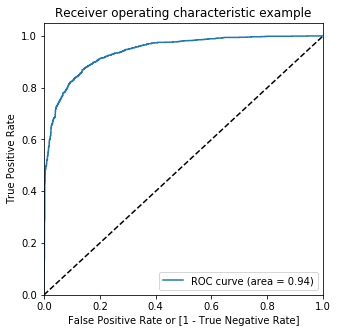

In [99]:
# Call the ROC function

draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

The area under the curve of the ROC is 0.94 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [100]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002902,0,1,0,0,0,0,0,0,0,0,0
1,1,0.928959,1,1,1,1,1,1,1,1,1,1,1
2,0,0.108478,0,1,1,0,0,0,0,0,0,0,0
3,1,0.942633,1,1,1,1,1,1,1,1,1,1,1
4,1,0.811960,1,1,1,1,1,1,1,1,1,1,0


In [101]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.498100  1.000000  0.000000
0.1   0.1  0.773908  0.975207  0.574132
0.2   0.2  0.811273  0.958042  0.665615
0.3   0.3  0.835655  0.934520  0.737539
0.4   0.4  0.850538  0.916084  0.785489
0.5   0.5  0.860988  0.890655  0.831546
0.6   0.6  0.861621  0.849968  0.873186
0.7   0.7  0.857505  0.798474  0.916088
0.8   0.8  0.841355  0.726001  0.955836
0.9   0.9  0.756175  0.520661  0.989905


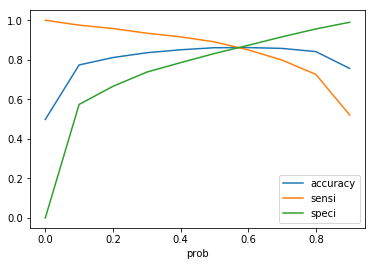

In [102]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.55, you get the optimal values of the three metrics. So let's choose 0.55 as our cutoff now.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002902,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.928959,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.108478,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.942633,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.811960,1,1,1,1,1,1,1,1,1,1,0,1


In [104]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8644711842938568

In [105]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[1356,  229],
       [ 199, 1374]])

In [106]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Calculate Sensitivity

TP/(TP+FN)

0.8734901462174189

In [108]:
# Calculate Specificity

TN/(TN+FP)

0.8555205047318613

## Making Predictions on the Test Data

Let's now make predicitons on the test set.

In [109]:
# Scale the test set as well using just 'transform'

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = list(X.columns)
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,0.0,0.0,0.0,0.087639,0.056711,0.042956,0.124420,0.105347,0.094813,0.017167,0.030479,0.030448,1.210666e-03,3.805399e-04,9.150020e-05,9.108115e-04,5.322376e-06,7.103586e-04,0.005140,0.005943,0.004481,0.004411,0.007898,0.010471,0.000842,0.000899,0.000810,2.754098e-02,2.763423e-02,3.991141e-02,0.009018,0.012547,0.011622,0.125303,1.019115e-01,0.095741,0.013425,2.342182e-02,2.248144e-02,0.004969,0.004082,1.639790e-03,0.0,0.0,0.0,0.105602,0.114589,0.114579,2.257828e-19,0.000001,5.471447e-19,0.029282,3.196665e-02,1.987488e-02,2.085715e-02,4.479333e-18,2.320700e-18,0.111927,0.121686,0.118748,0.004648,0.007039,0.007772,0.010690,0.012312,0.011232,0.003563,0.002453,0.003191,0.011236,0.015591,0.018143,0.003687,0.004319,0.005068,0.010389,0.005223,0.013359,1.809999e-18,1.391328e-03,1.274662e-03,0.0,0.0,0.0,0.007892,0.006492,0.013613,0.017727,0.019450,0.030129,0.113077,6.153846e-03,5.128205e-02,0.001880,2.835094e-03,5.040804e-03,0.002650,8.525149e-04,0.007883,0.141439,0.211538,0.091913,0.040736,0.044360,0.041239,0.032974,0.034913,0.029428,0.030468,0.022784,1.334786e-02,1.048951e-02,2.197802e-03,5.128205e-03,0.050194,0.153042,1.184788e-01,8.700130e-18,0.000103,9.234285e-04,0.019231,7.692308e-02,5.128205e-02,1.709402e-01,0.215976,0.312821,9.615385e-03,2.498002e-17,0.009615,6.993007e-03,2.197802e-03,9.251859e-19,0.132504,8.237667e-03,3.383890e-04,0.000000
1,0.0,0.0,0.0,0.081778,0.032676,0.013954,0.009710,0.004940,0.003570,0.028793,0.025050,0.019671,3.243597e-02,2.779964e-02,5.717515e-03,1.724207e-02,1.779828e-02,5.184257e-03,0.005105,0.003847,0.003222,0.024470,0.012822,0.013669,0.004203,0.001735,0.002589,1.666605e-02,7.545251e-03,1.344895e-02,0.027163,0.014598,0.012700,0.003912,7.076617e-04,0.000516,0.011270,1.070528e-02,8.713892e-03,0.001003,0.007713,1.495078e-03,0.0,0.0,0.0,0.014011,0.008899,0.007896,2.257828e-19,0.000053,1.134837e-04,0.011921,1.102710e-02,2.260946e-03,1.742696e-02,5.293757e-18,1.160350e-18,0.031473,0.019194,0.017202,0.004163,0.005472,0.005173,0.020566,0.017583,0.014632,0.004651,0.009438,0.006

In [110]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [111]:
# Check X_test_sm

X_test_sm

,const,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_mou_8,total_og_mou_8,loc_ic_mou_8,total_ic_mou_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_8,monthly_3g_8,vbc_3g_7
0,1.0,0.010471,0.012547,0.011622,0.114579,0.118748,0.018143,0.030129,0.091913,0.029428,1.334786e-02,9.234285e-04,1.923077e-02,5.128205e-02,9.615385e-03,3.383890e-04
1,1.0,0.013669,0.014598,0.012700,0.007896,0.017202,0.019693,0.028715,0.031746,0.021375,9.440324e-03,6.395059e-03,1.904762e-01,6.349206e-02,2.976190e-03,8.235815e-02
2,1.0,0.038588,0.035225,0.045911,0.125030,0.152117,0.056711,0.067601,0.043077,0.070158,4.002398e-02,2.032202e-03,1.666667e-02,2.222222e-02,4.166667e-03,3.100911e-17
3,1.0,0.053491,0.069374,0.038890,0.000177,0.029194,0.021199,0.018619,0.030769,0.006743,3.194168e-18,1.892506e-18,2.500000e-01,2.775558e-17,0.000000e+00,1.856943e-03
4,1.0,0.182996,0.160041,0.131451,0.000000,0.097301,0.327583,0.287665,0.035897,0.044504,2.922005e-02,5.663626e-02,2.500000e-01,3.333333e-01,0.000000e+00,1.628971e-01
5,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020513,0.043605,4.360530e-02,1.892506e-18,1.387779e-17,2.775558e-17,0.000000e+00,3.100911e-17
6,1.0,0.214098,0.172792,0.192344,0.002144,0.145271,0.192334,0.177010,0.038177,0.055468,3.061862e-02,2.894617e-02,1.388889e-01,2.222222e-01,2.777778e-02,1.371590e-02
7,1.0,0.024042,0.040173,0.037970,0.005242,0.086457,0.036747,0.058145,0.142735,0.044879,2.022927e-02,0.000000e+00,1.387779e-17,2.775558e-17,0.000000e+00,3.100911e-17
8,1.0,0.056131,0.056524,0.055459,0.012227,0.053181,0.050330,0.050068,0.065527,0.055993,2.946979e-02,6.101555e-02,5.555556e-02,1.111111e-01,9.027778e-02,2.852777e-01
9,1.0,0.000000,0.067304,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.011238,3.194168e-18,1.892506e-18,1.387779e-17,2.775558e-17,0.000000e+00,3.100911e-17


In [112]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [113]:
y_test_pred[:10]

0    0.319983
1    0.460553
2    0.126154
3    0.531832
4    0.000010
5    0.909463
6    0.000079
7    0.093527
8    0.015364
9    0.929759
dtype: float64

In [114]:
# Reshaping it into an array

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([3.19983179e-01, 4.60552515e-01, 1.26154324e-01, 5.31832095e-01,
       1.04038762e-05, 9.09463178e-01, 7.86152943e-05, 9.35270827e-02,
       1.53644439e-02, 9.29758530e-01])

In [115]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.002902
1,1,0.928959
2,0,0.108478
3,1,0.942633
4,1,0.811960


In [116]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [117]:
# Let's see the head

y_pred_1.head()

,0
0,0.319983
1,0.460553
2,0.126154
3,0.531832
4,0.000010


In [118]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [119]:
y_test_df= y_test_df.rename(columns = {0 : 'Churn'})

In [120]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [122]:
# Check 'y_pred_final'

y_pred_final.head()

,Churn,0
0,0,0.319983
1,0,0.460553
2,0,0.126154
3,1,0.531832
4,0,0.000010


In [123]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Churn_Prob'})

In [124]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Churn,Churn_Prob
0,0,0.319983
1,0,0.460553
2,0,0.126154
3,1,0.531832
4,0,0.000010


In [125]:
# Make predictions on the test set using 0.55 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

In [126]:
# Check y_pred_final

y_pred_final.head()

,Churn,Churn_Prob,final_predicted
0,0,0.319983,0
1,0,0.460553,0
2,0,0.126154,0
3,1,0.531832,0
4,0,0.000010,0


In [127]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Churn'], y_pred_final.final_predicted)

0.8441654357459379

In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final['Churn'], y_pred_final.final_predicted )
confusion2

array([[583,  88],
       [123, 560]])

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Calculate sensitivity
TP / float(TP+FN)

0.8199121522693997

In [131]:
# Calculate specificity
TN / float(TN+FP)

0.8688524590163934

### Conclusion 

### The model performs well with Test data as well with a Sensitivity of 81.99%

#### Following are the list of important features identified based on the Logistic Regression model.

#### Local Outgoing in the action phase (**loc_og_mou_8**) has the biggest impact to predicting Churn as it has the higest coofficent value of -31, followed by total incoming (**total_ic_mou_8**), 3G internet usage (**monthly_3g_8**) and outgoing STD (**std_og_mou_8**) in the action phase 

Plotting the identified features for churn customers for visualization

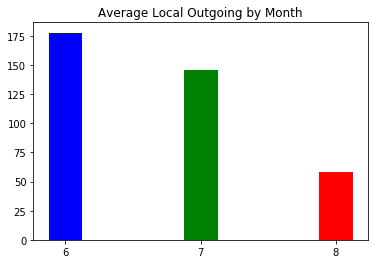

In [132]:
plt.bar(6, df_hv.loc[df_hv['churn']==1,'loc_og_mou_6'].mean(), color = 'b', width = 0.25)
plt.bar(7, df_hv.loc[df_hv['churn']==1,'loc_og_mou_7'].mean(), color = 'g', width = 0.25)
plt.bar(8, df_hv.loc[df_hv['churn']==1,'loc_og_mou_8'].mean(), color = 'r', width = 0.25)
plt.xticks([6,7,8])
plt.title('Average Local Outgoing by Month')
plt.show()

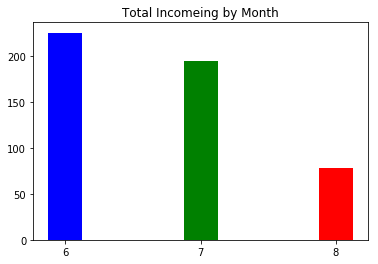

In [133]:
plt.bar(6, df_hv.loc[df_hv['churn']==1,'total_ic_mou_6'].mean(), color = 'b', width = 0.25)
plt.bar(7, df_hv.loc[df_hv['churn']==1,'total_ic_mou_7'].mean(), color = 'g', width = 0.25)
plt.bar(8, df_hv.loc[df_hv['churn']==1,'total_ic_mou_8'].mean(), color = 'r', width = 0.25)
plt.xticks([6,7,8])
plt.title('Total Incomeing by Month')
plt.show()

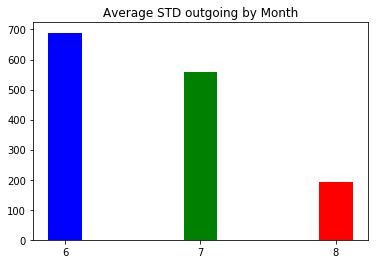

In [135]:
plt.bar(6, df_hv.loc[df_hv['churn']==1,'std_og_mou_6'].mean(), color = 'b', width = 0.25)
plt.bar(7, df_hv.loc[df_hv['churn']==1,'std_og_mou_7'].mean(), color = 'g', width = 0.25)
plt.bar(8, df_hv.loc[df_hv['churn']==1,'std_og_mou_8'].mean(), color = 'r', width = 0.25)
plt.xticks([6,7,8])
plt.title('Average STD outgoing by Month')
plt.show()

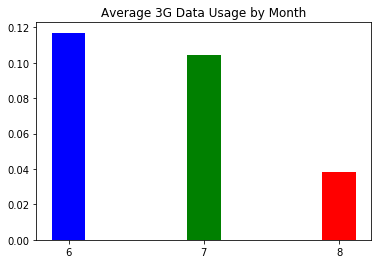

In [137]:
plt.bar(6, df_hv.loc[df_hv['churn']==1,'monthly_3g_6'].mean(), color = 'b', width = 0.25)
plt.bar(7, df_hv.loc[df_hv['churn']==1,'monthly_3g_7'].mean(), color = 'g', width = 0.25)
plt.bar(8, df_hv.loc[df_hv['churn']==1,'monthly_3g_8'].mean(), color = 'r', width = 0.25)
plt.xticks([6,7,8])
plt.title('Average 3G Data Usage by Month')
plt.show()

## How to manage customer Churn

Based on our data analysis we can conclude that customer churn can be reduced and predicted based on customer usage patterns. As concluded from our above analysis certain aspects of customer behavior can be reviewed on regular basis to predict if a customer is potentially going to churn or not. 

Some of the importent features to monitor are:
- Local Outgoing Usage
- STD Outgoing Usage
- Total Incomming Usage
- Monthly Data(2g/3g) Usage 

Any customer who is about to chrun whould show a decrease in any/all the above features when compared with past monthly usage.
This analysis can be used to identify potential customers who are about to churn, once identified nesessary actions can be taken to avoid loosing these customers and reduce customer churn
